In [2]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
dataset = pd.read_csv('data/2022-feature-dataset.csv')
#dataset['Resultado'] = dataset.apply(lambda row: 1.0 if row['Resultado'] == 'Positivo' else 0.0,axis=1)
X = dataset.drop('Resultado',axis=1)
y = dataset['Resultado']
y

0        Negativo
1        Negativo
2        Negativo
3        Negativo
4        Negativo
           ...   
10279    Negativo
10280    Negativo
10281    Negativo
10282    Negativo
10283    Negativo
Name: Resultado, Length: 10284, dtype: object

In [60]:
from sklearn.impute import SimpleImputer


imp = SimpleImputer(strategy="mean")
X_ = pd.DataFrame(imp.fit_transform(X), columns=X.columns)


In [5]:
importances = mutual_info_classif(X_,y)
importances

array([0.01061137, 0.00068093, 0.00905811, 0.01087519, 0.00113901,
       0.00811865, 0.00827278, 0.00087772, 0.00321861, 0.        ,
       0.00174282, 0.        , 0.0025874 , 0.00763256, 0.00787916,
       0.00215751, 0.06951882, 0.06505548, 0.07091702, 0.07126464,
       0.06815266, 0.06824615, 0.06639267, 0.06533046, 0.06448436,
       0.07141165, 0.0652387 , 0.06573255, 0.0687072 , 0.06373549,
       0.06920053, 0.07251219, 0.06827367, 0.07095904, 0.07051638,
       0.06340956, 0.0670664 , 0.07138734, 0.07015609, 0.06824153,
       0.07005367, 0.0658983 , 0.06926785, 0.06464742, 0.07049766,
       0.07154058, 0.07101247, 0.06928284, 0.07322471, 0.06860054,
       0.06973934, 0.06802696, 0.06904787, 0.06347943, 0.06495729,
       0.06607266, 0.06687172, 0.06858347, 0.06941816, 0.06666928,
       0.06953101, 0.07013198, 0.07231439, 0.06804287, 0.02206483,
       0.02532633, 0.02370036, 0.02648611, 0.02544476, 0.02168272,
       0.0298544 , 0.02073914, 0.02946154, 0.02495189, 0.02643

In [51]:
from sklearn.feature_selection import r_regression


importances = r_regression(X_,y)
importances

array([ 0.07161997,  0.04500658,  0.03525487,  0.03044038,  0.02012657,
        0.01526541, -0.00049068, -0.03283669, -0.03431856,  0.00209218,
        0.00631759,  0.00836838,  0.00962376,  0.02128019,  0.02751311,
        0.03352488,  0.03974742,  0.03965518,  0.03960341,  0.03959937,
        0.03978104,  0.03979432,  0.0398534 ,  0.03981814,  0.08636419,
        0.09753506,  0.10110705,  0.10148161,  0.09234008,  0.09545535,
        0.09449354,  0.0976656 ,  0.09904364,  0.08076788,  0.07099866,
        0.09352588,  0.07042013,  0.08250609,  0.09342694,  0.08061127,
        0.09904364,  0.08076788,  0.07099866,  0.09352588,  0.07042013,
        0.08250609,  0.09342694,  0.08061127,  0.07948927,  0.05781548,
        0.05756455,  0.05084421,  0.04744092,  0.03368003,  0.02003427,
        0.01365757, -0.03899826, -0.03300639, -0.03448631, -0.03423137,
       -0.03482228, -0.0360247 , -0.03373639, -0.03122846,  0.06386488,
        0.06991783,  0.04363855,  0.05558573,  0.0553377 ,  0.06

In [56]:
from sklearn.feature_selection import chi2


X_ = abs(X_)
importances = chi2(X_,y)
importances = importances[0]

In [61]:
from sklearn.feature_selection import f_classif


importances = f_classif(X_,y)
importances = importances[0]

In [62]:

feat_importances_ = pd.DataFrame()
feat_importances_['importances'] = importances
feat_importances_['columns'] =  X.columns
feat_importances_['variable'] =  feat_importances_.apply(lambda x: x['columns'][:-2],axis = 1)
#feat_importances = feat_importances.sort_values(ascending=False).head(20)
#feat_importances = feat_importances[::-1]
feat_importances__ = feat_importances_.groupby('variable').agg({'importances':'mean'}).reset_index().sort_values(by=['importances'], ascending=True)
feat_importances__


,variable,importances
1,NDVI,4.783548
5,RootMoist_inst,12.347156
0,LST_Day_1km,14.234764
2,Psurf_f_inst,16.256865
9,srad,19.273936
7,Wind_f_inst,25.201874
8,prcp,44.540985
12,vp,48.219851
4,Rainf_tavg,73.962908
6,Tair_f_inst,73.962908


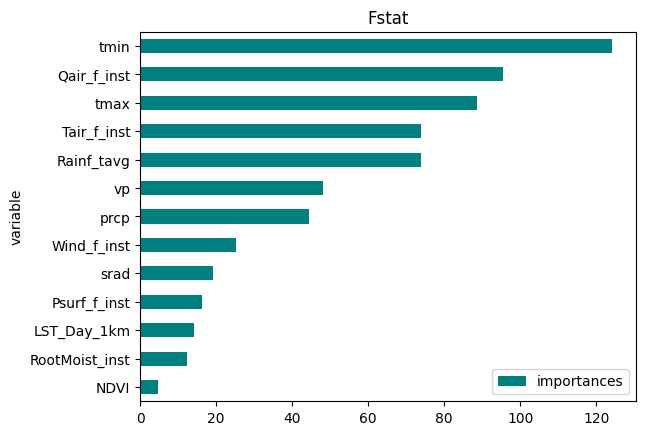

In [63]:
feat_importances__.plot(x='variable', title='Fstat', kind='barh', color='teal')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib as plt
sns.set(font_scale=0.5)

def chart_var(name):
    fig, axes = plt.pyplot.subplots(2, 4,  sharey=True)
    fig.suptitle(name)
    for i in range(1,9):
        sns.distplot(X_[name+'_'+str(i)],ax=axes[(i-1)//4,(i-1)%4])

def chart_boxplot(name):
    fig, axes = plt.pyplot.subplots(2, 4,  sharey=True)
    fig.suptitle(name)
    for i in range(1,9):
        sns.boxplot(data=dataset, 
                    x="Resultado", 
                    y= name+'_'+str(i), 
                    hue="Resultado",
                    ax=axes[(i-1)//4,(i-1)%4])


chart_boxplot('prcp')
chart_boxplot('srad')
chart_boxplot('tmax')
chart_boxplot('tmin')
chart_boxplot('vp')


chart_boxplot('Psurf_f_inst')
chart_boxplot('Qair_f_inst')
chart_boxplot('Rainf_tavg')
chart_boxplot('RootMoist_inst')
chart_boxplot('Tair_f_inst')
chart_boxplot('Wind_f_inst')

chart_boxplot('NDVI')
chart_boxplot('LST_Day_1km')




In [ ]:
chart_boxplot('Wind_f_inst')
chart_boxplot('vp')
chart_boxplot('NDVI')
chart_boxplot('srad')
chart_boxplot('prcp')
chart_boxplot('Lai')
chart_boxplot('NDVI-d')
chart_boxplot('LST_Day_1km')

In [ ]:
chart_var('prcp')
chart_var('srad')
chart_var('tmax')
chart_var('tmin')
chart_var('vp')


chart_var('Psurf_f_inst')
chart_var('Qair_f_inst')
chart_var('Rainf_tavg')
chart_var('RootMoist_inst')
chart_var('Tair_f_inst')
chart_var('Wind_f_inst')

chart_var('NDVI')
chart_var('LST_Day_1km')
